In [1]:
import hkvfewspy as hkv
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [2]:
pi = hkv.pi
pi.setClient(wsdl='http://www.oms-waddenzee.nl:8081/FewsPiService/fewspiservice?wsdl')

In [3]:
date_fc = datetime.now() + timedelta(days=9)
date_fc = date_fc.replace(hour=0, minute=0, second=0, microsecond=0)

In [4]:
date_fc

datetime.datetime(2018, 8, 18, 0, 0)

In [5]:
query = pi.setQueryParameters(prefill_defaults=True)

In [6]:
query.parameterIds(['m3.minDepth.cut.f'])
query.startTime(date_fc)
query.endTime(date_fc)
query.clientTimeZone('Etc/GMT-1')

In [7]:
df, entry = pi.getTimeSeries(queryParameters=query, setFormat='df')

In [8]:
dates = df.index.get_level_values(0).drop_duplicates()
df_fc = df.loc[dates[0]]  
df_fc.reset_index(inplace=True)

column_name = 'Voorspeld (+10 dagen) volume cut tov NGD (m3)'
df_fc.rename(columns={'value': column_name}, inplace=True)
#df_fc = df_fc[['locationId', column_name]]

In [9]:
df_fc.head()

,moduleInstanceId,qualifierId,parameterId,units,locationId,stationName,flag,Voorspeld (+10 dagen) volume cut tov NGD (m3)
0,pr.Wind.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut.f,m3,bv.1.7.1.1,"Den Helder - Texel, Vaarweg",0.0,311.10
1,pr.Wind.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut.f,m3,bv.1.7.1.1.1.1,"Den Helder veerhaven, Vak A",0.0,417.73
2,pr.Wind.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut.f,m3,bv.1.7.1.1.1.2,"Den Helder veerhaven, Vak B",0.0,3.13
3,pr.Wind.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut.f,m3,bv.1.7.1.1.1.3,"Den Helder veerhaven, Vak C",0.0,4.23
4,pr.Wind.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut.f,m3,bv.1.7.1.1.2.1,"Texel veerhaven, Vak A",0.0,372.04


In [10]:
import altair as alt
alt.renderers.enable('default')
alt.renderers.names()

['colab', 'default', 'json', 'jupyterlab', 'nteract', 'png', 'svg']

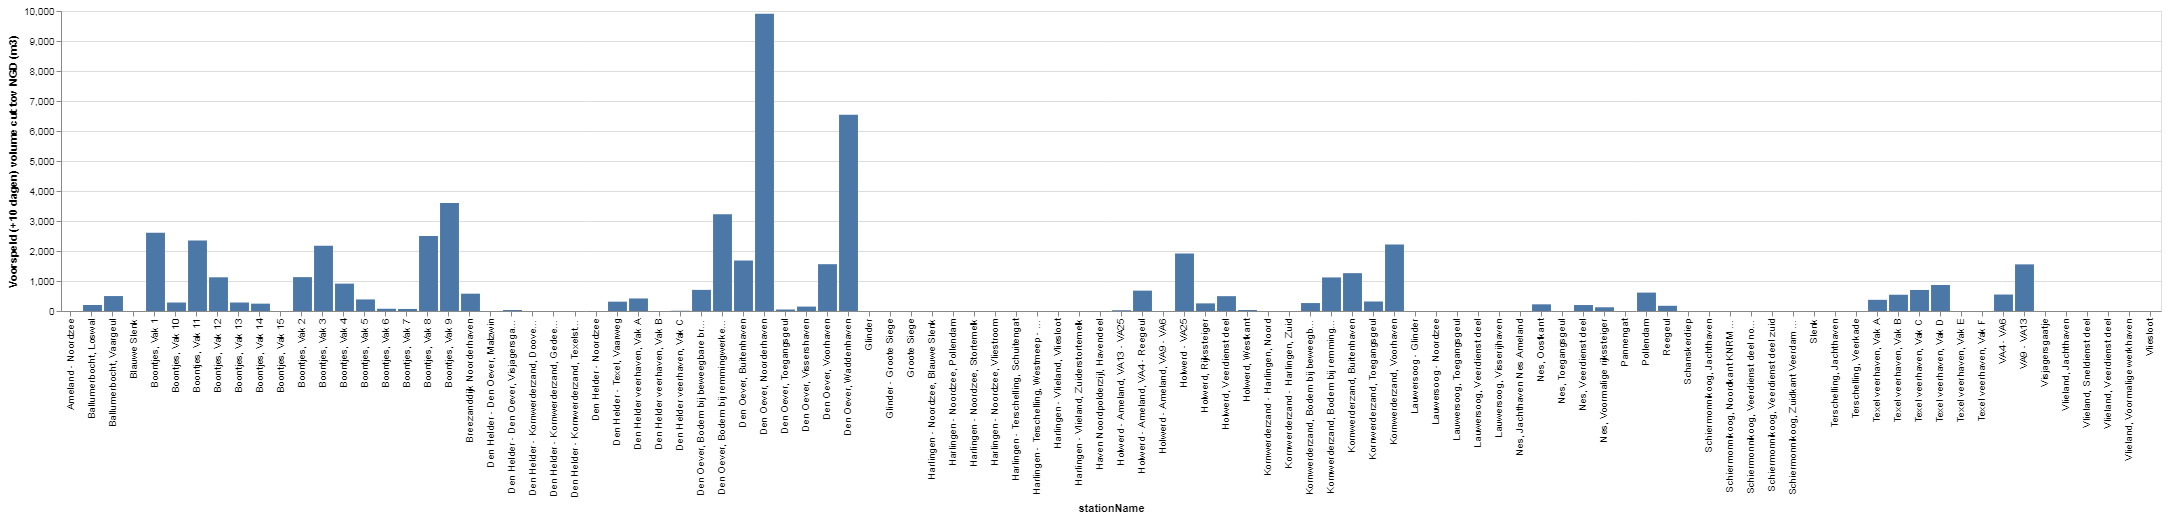

In [13]:
fig = alt.Chart(df_fc).mark_bar().encode(
    x='stationName',
    y='Voorspeld (+10 dagen) volume cut tov NGD (m3)',
    tooltip=['locationId', 'stationName', 'Voorspeld (+10 dagen) volume cut tov NGD (m3)']
)
fig

In [14]:
prio_refined = r'D:\Projects\Pr\3317.20\prioritering\prioritering_refined.csv'

In [15]:
df_rf = pd.read_csv(prio_refined)

In [16]:
df_rf.head()

,Objectcode,Objectnaam,Activiteit,NGD (-mNAP),OHD (-mNAP),Volume cut tov NGD (m3),Volume cut tov OHD (m3),Percentage cut tov NGD (%),Percentage cut tov OHD (%),Gemiddelde dikte cut tov NGD (cm),Gemiddelde dikte cut tov OHD (cm)
0,bv.1.7.2.3.2,Blauwe Slenk,Taak,7.5,8.0,4644,50287,7,33,1,10
1,bv.1.7.1.3.1,Visjagersgaatje,Raamact.,3.5,4.0,0,280,0,3,0,0
2,bv.1.7.3.1.1,Holwerd - VA25,Taak,3.8,4.0,2355,10208,9,26,1,4
3,bv.1.7.3.1.2.A,VA4 - VA6,Taak,3.8,4.0,229,577,5,10,1,2
4,bv.1.7.3.1.3,Reegeul,Taak,3.8,4.0,138,460,3,7,0,1


In [17]:
df_merge = df_rf.merge(df_fc, how='left', left_on='Objectcode', right_on='locationId')

In [18]:
df_out = df_merge[['Objectcode', 'Objectnaam', 'Activiteit', 'NGD (-mNAP)', 'OHD (-mNAP)',
       'Volume cut tov NGD (m3)', 'Volume cut tov OHD (m3)', 'Voorspeld (+10 dagen) volume cut tov NGD (m3)',
       'Percentage cut tov NGD (%)', 'Percentage cut tov OHD (%)',
       'Gemiddelde dikte cut tov NGD (cm)',
       'Gemiddelde dikte cut tov OHD (cm)'
       ]]

In [22]:
df_out.sort_values(by=['Volume cut tov NGD (m3)'], ascending=False)

,Objectcode,Objectnaam,Activiteit,NGD (-mNAP),OHD (-mNAP),Volume cut tov NGD (m3),Volume cut tov OHD (m3),Voorspeld (+10 dagen) volume cut tov NGD (m3),Percentage cut tov NGD (%),Percentage cut tov OHD (%),Gemiddelde dikte cut tov NGD (cm),Gemiddelde dikte cut tov OHD (cm)
44,bv.1.7.1.3.2.4,"Den Oever, Noorderhaven",Benoemd,4.0,4.40,9689,31669,9911.01,62,90,14,46
37,bv.1.7.1.3.2.5,"Den Oever, Waddenhaven",Taak,3.2,3.60,6157,21327,6541.08,25,86,9,31
0,bv.1.7.2.3.2,Blauwe Slenk,Taak,7.5,8.00,4644,50287,0.00,7,33,1,10
20,bv.1.7.1.5.1.I,"Boontjes, Vak 9",Raamact.,3.8,4.30,3743,8559,3601.07,13,32,7,17
58,bv.1.7.1.3.2.7,"Den Oever, Bodem bij remmingwerken / steiger",Benoemd,3.0,3.40,3212,4184,3228.95,98,98,129,167
19,bv.1.7.1.5.1.H,"Boontjes, Vak 8",Raamact.,3.8,4.30,2647,6509,2499.43,9,27,5,13
10,bv.1.7.1.5.1.K,"Boontjes, Vak 11",Raamact.,3.8,4.30,2512,16705,2352.08,28,81,5,34
25,bv.1.7.1.5.1.C,"Boontjes, Vak 3",Raamact.,3.8,4.30,2486,21094,2175.74,30,98,5,42
2,bv.1.7.3.1.1,Holwerd - VA25,Taak,3.8,4.00,2355,10208,1919.51,9,26,1,4
43,bv.1.7.1.4.1.3,"Kornwerderzand, Voorhaven",Taak,4.0,4.40,2215,13227,2215.78,37,94,6,36
